In [82]:
import pandas as pd
import numpy as np
from datetime import datetime
from download import download
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl
import os

In [83]:
data = pd.read_csv("ag.csv", header=1, parse_dates=["Price Date"])
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26


In [84]:
data = data.iloc[::-1]
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1826,1827,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-01
1825,1826,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-02
1824,1825,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-04
1823,1824,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,2020-01-05
1822,1823,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,2020-01-06


In [85]:
data_agra = data[data["Market Name"] == "Agra"]
data_agra.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
590,591,Agra,Agra,Potato,Desi,FAQ,1300,1500,1400,2020-01-02
589,590,Agra,Agra,Potato,Desi,FAQ,1300,1450,1380,2020-01-03
588,589,Agra,Agra,Potato,Desi,FAQ,1240,1400,1310,2020-01-04
587,588,Agra,Agra,Potato,Desi,FAQ,1200,1350,1280,2020-01-06
586,587,Agra,Agra,Potato,Desi,FAQ,1200,1400,1300,2020-01-07


In [86]:
data_agra.rename(columns={"Max Price (Rs./Quintal)" : "Price", 
                         "Price Date": "Date"}, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [87]:
data_agra_index =data_agra.set_index('Date')
data_agra_index.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Price,Modal Price (Rs./Quintal)
Date,,,,,,,,,
2020-01-02,591,Agra,Agra,Potato,Desi,FAQ,1300,1500,1400
2020-01-03,590,Agra,Agra,Potato,Desi,FAQ,1300,1450,1380
2020-01-04,589,Agra,Agra,Potato,Desi,FAQ,1240,1400,1310
2020-01-06,588,Agra,Agra,Potato,Desi,FAQ,1200,1350,1280
2020-01-07,587,Agra,Agra,Potato,Desi,FAQ,1200,1400,1300


In [88]:
data1 = data_agra_index.drop(["Modal Price (Rs./Quintal)", "Min Price (Rs./Quintal)", "Grade", "Variety", "Commodity", "Market Name", "District Name", "Sl no."], axis=1)
data1.head(2)

,Price
Date,
2020-01-02,1500
2020-01-03,1450


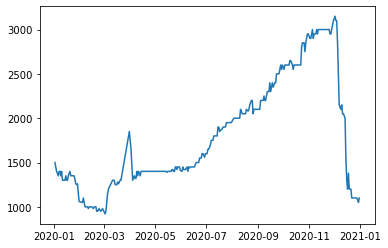

In [89]:
plt.plot(data1)

## Ckeck Stationarity

In [90]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data1["Price"])

print(f'Test Stats: {result[0]}')
print(f"P-Value: {result[1]}")
print(f"Critical Value: {result[4]}")

if result[1] > 0.05:
    print("\nSeries is not Stationary")
else:
    print("\nseries is stationary")
    
    
# test stats always prefer to be good if it's lower

Test Stats: -1.6545666894191609
P-Value: 0.45465986238309875
Critical Value: {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}

Series is not Stationary


## Making Stationary 

In [91]:
import statsmodels.api as sm
import pmdarima as pm

In [92]:
pm.arima.ndiffs(data1["Price"], alpha=0.05, test='kpss', max_d=4)

1

## Removing Trend

In [93]:
data1["shift_1"] = data1["Price"].shift(1)
data1["diff"] = data1["Price"] - data1["Price"].shift()
data1

,Price,shift_1,diff
Date,,,
2020-01-02,1500,NaN,NaN
2020-01-03,1450,1500.0,-50.0
2020-01-04,1400,1450.0,-50.0
2020-01-06,1350,1400.0,-50.0
2020-01-07,1400,1350.0,50.0
...,...,...,...
2020-12-26,1100,1100.0,0.0
2020-12-28,1100,1100.0,0.0
2020-12-29,1080,1100.0,-20.0


<AxesSubplot:xlabel='Date'>

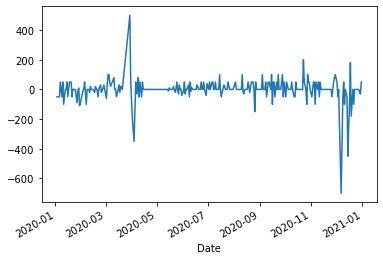

In [94]:
data1["diff"].plot()

we are shifting here by one so in arima model in p,d,q parameter d will be 1

### Checking By ADF Again

In [95]:
data_mod = data1.dropna()
data_mod

,Price,shift_1,diff
Date,,,
2020-01-03,1450,1500.0,-50.0
2020-01-04,1400,1450.0,-50.0
2020-01-06,1350,1400.0,-50.0
2020-01-07,1400,1350.0,50.0
2020-01-08,1400,1400.0,0.0
...,...,...,...
2020-12-26,1100,1100.0,0.0
2020-12-28,1100,1100.0,0.0
2020-12-29,1080,1100.0,-20.0


In [96]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_mod["diff"])

print(f'Test Stats: {result[0]}')
print(f"P-Value: {result[1]}")
print(f"Critical Value: {result[4]}")

if result[1] > 0.05:
    print("\nSeries is not Stationary")
else:
    print("\nseries is stationary")

Test Stats: -4.325548658507137
P-Value: 0.00040107253469472956
Critical Value: {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}

series is stationary


## Plot ACF 

In [97]:
import statsmodels.api as sm

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


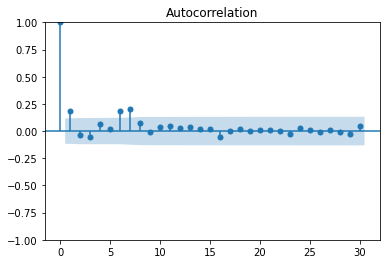

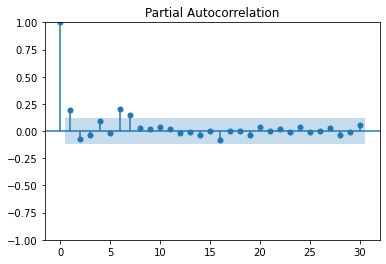

In [98]:
sm.graphics.tsa.plot_acf(data_mod['diff'], lags=30);
sm.graphics.tsa.plot_pacf(data_mod['diff'], lags=30);


we are not getting any informationfrom this graph so

we are going to use auto Arima that will give the  P,D,Q value

## Auto Arima

In [99]:
import pmdarima as pm

In [100]:
model = pm.auto_arima(data_mod["diff"], seasonal=True, m=12, start_P=0, d=1, start_q=0, max_order=4,
                      test='adf', error_action='ignore', suppress_warnings=True,
                     stepwise=True, trace=True)


# if your data has seasonality then set   seasonal=True
# m=12 is seasonality occurance period
#
# stepwise=True it will perform like randomsearch and take less time to calculate
# trace=True it wil give information on each step like verbose
# Lower AIC is good for model
#

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=3360.489, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3419.775, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3384.447, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3285.582, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3417.779, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3283.727, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3285.573, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3286.714, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3279.642, Time=0.13 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=3281.602, Time=0.29 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3281.604, Time=0.27 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=3283.006, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3382.466, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=3278.062, Time=0.20 sec
 ARIMA(2,1,1)(1,0,0

In [101]:
model1 = pm.auto_arima(data_mod["diff"], seasonal=False, start_P=0, d=1, start_q=0, max_order=4,
                      test='adf', error_action='ignore', suppress_warnings=True,
                     stepwise=False, trace=True)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3419.775, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3283.727, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3278.418, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3279.818, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3276.860, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3382.466, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3279.642, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3280.201, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3280.833, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3358.493, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3278.062, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3283.366, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3330.220, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3277.610, Time=0.27 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3324.874, Time=0.16 sec

Best mode

In [102]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1632.889
Date:                Mon, 27 Dec 2021   AIC                           3275.778
Time:                        23:17:05   BIC                           3294.005
Sample:                             0   HQIC                          3283.086
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1268      0.042      2.998      0.003       0.044       0.210
ar.L2         -0.1190      0.051     -2.345      0.019      -0.219      -0.020
ar.L3         -0.1033      0.038     -2.712      0.007      -0.178      -0.029
ma.L1         -0.9326      0.017    -53.973      0.000      -0.967      -0.899
sigma2      5967.3959    200.082     29.825      0.000    5575.242    6359.550
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8951.47
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                            -2.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 1, 4)   Log Likelihood               -1632.430
Date:                Mon, 27 Dec 2021   AIC                           3276.860
Time:                        23:17:05   BIC                           3298.732
Sample:                             0   HQIC                          3285.630
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1215      0.359     -0.338      0.735      -0.826       0.583
ma.L1         -0.7882      0.049    -16.105      0.000      -0.884      -0.692
ma.L2         -0.2416      0.069     -3.515      0.000      -0.376      -0.107
ma.L3         -0.0413      0.048     -0.860      0.390      -0.135       0.053
ma.L4          0.1310      0.042      3.154      0.002       0.050       0.212
sigma2      5947.1176    197.804     30.066      0.000    5559.430    6334.805
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              8685.53
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                            -2.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
model2 = pm.auto_arima(data_mod["Price"], seasonal=True, start_P=0, d=1, start_q=0, max_order=4,
                      test='adf', error_action='ignore', suppress_warnings=True,
                     stepwise=False, trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=3282.948, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=3273.843, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=3275.827, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=3275.887, Time=0.12 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=3274.738, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=3274.831, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=3275.835, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=3277.688, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=3276.882, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=3275.191, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=3277.099, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=3274.446, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=3276.890, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=3276.303, Time=0.21 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=3276.751, Time=0.12 sec

Best mode

### Train Test Split

In [105]:
data_mod1 = data_mod.drop(["diff", "shift_1"], axis=1)
data_mod1

,Price
Date,
2020-01-03,1450
2020-01-04,1400
2020-01-06,1350
2020-01-07,1400
2020-01-08,1400
...,...
2020-12-26,1100
2020-12-28,1100
2020-12-29,1080


In [160]:
train_data = data_mod1.iloc[0:280]
validation_data = data_mod1.iloc[280:]
final_trainData = data_mod1

In [161]:
# train_data = data_mod1.iloc[5:]
# validation_data = data_mod1.iloc[0:5]
# final_trainData = data_mod1

In [162]:
validation_data

,Price
Date,
2020-12-28,1100
2020-12-29,1080
2020-12-30,1050
2020-12-31,1100


## Build ARIMA

In [163]:
model2.fit(train_data)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [164]:
# model1.fit(data_mod["diff"])

In [167]:
forecast = model2.predict(n_periods=4, return_conf_int=True)

In [168]:
forecast

(array([1098.89172368, 1097.60361446, 1096.31550523, 1095.02739601]),
 array([[ 945.4450412 , 1252.33840616],
        [ 857.67940563, 1337.52782328],
        [ 793.69136939, 1398.93964108],
        [ 740.62774983, 1449.42704219]]))

### Evaluate The Model

In [169]:
validation_data.index

DatetimeIndex(['2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31'], dtype='datetime64[ns]', name='Date', freq=None)

In [170]:
forecast_df = pd.DataFrame(forecast[0], index=validation_data.index, columns=["Pred"])
forecast_df

,Pred
Date,
2020-12-28,1098.891724
2020-12-29,1097.603614
2020-12-30,1096.315505
2020-12-31,1095.027396


In [172]:
pd.concat([validation_data["Price"], forecast_df], axis=1)

,Price,Pred
Date,,
2020-12-28,1100,1098.891724
2020-12-29,1080,1097.603614
2020-12-30,1050,1096.315505
2020-12-31,1100,1095.027396


<AxesSubplot:xlabel='Date'>

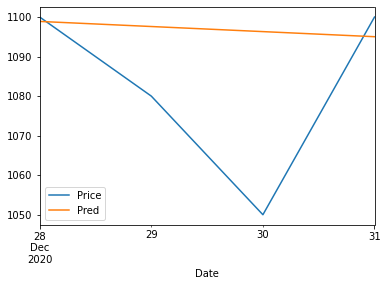

In [173]:
pd.concat([validation_data["Price"], forecast_df], axis=1).plot()

##### Predictfor next 8 days

In [174]:
forecast8 = model2.predict(n_periods=8, return_conf_int=False)

In [175]:
forecast_range = pd.date_range(start="2020-12-28", periods=8, freq="D")

In [176]:
forecast_range

DatetimeIndex(['2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31',
               '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04'],
              dtype='datetime64[ns]', freq='D')

In [177]:
forecast_df1 = pd.DataFrame(forecast8, index=forecast_range, columns=["Pred1"])
forecast_df1

,Pred1
2020-12-28,1098.891724
2020-12-29,1097.603614
2020-12-30,1096.315505
2020-12-31,1095.027396
2021-01-01,1093.739287
2021-01-02,1092.451178
2021-01-03,1091.163068
2021-01-04,1089.874959


In [178]:
pd.concat([validation_data["Price"], forecast_df1], axis=1)

,Price,Pred1
2020-12-28,1100.0,1098.891724
2020-12-29,1080.0,1097.603614
2020-12-30,1050.0,1096.315505
2020-12-31,1100.0,1095.027396
2021-01-01,NaN,1093.739287
2021-01-02,NaN,1092.451178
2021-01-03,NaN,1091.163068
2021-01-04,NaN,1089.874959


<AxesSubplot:>

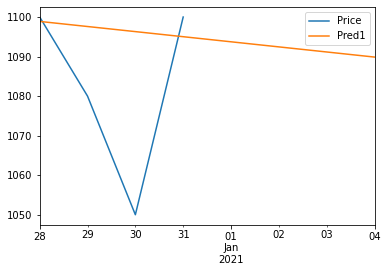

In [179]:
pd.concat([validation_data["Price"], forecast_df1], axis=1).plot()

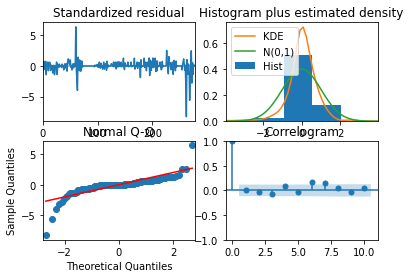

In [180]:
out = model2.plot_diagnostics()

### Final model For Forecasting

In [181]:
model2.fit(final_trainData)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [187]:
forecast_F = model2.predict(n_periods=10, return_conf_int=True)

In [188]:
forecast_F

(array([1110.28443158, 1109.26502233, 1108.24561309, 1107.22620385,
        1106.20679461, 1105.18738537, 1104.16797613, 1103.14856688,
        1102.12915764, 1101.1097484 ]),
 array([[ 957.78582137, 1262.78304178],
        [ 870.87201132, 1347.65803334],
        [ 807.56866139, 1408.92256479],
        [ 755.11538199, 1459.33702571],
        [ 709.27174645, 1503.14184276],
        [ 667.99997242, 1542.37479831],
        [ 630.13397352, 1578.20197873],
        [ 594.93243451, 1611.36469926],
        [ 561.88936015, 1642.36895513],
        [ 530.64113368, 1671.57836312]]))

In [200]:
forecast_range_F = pd.date_range(start="2021-01-01", periods=10, freq="D")

In [201]:
forecast_range_F

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10'],
              dtype='datetime64[ns]', freq='D')

In [202]:
forecast_df_F = pd.DataFrame(forecast_F[0], index=forecast_range_F, columns=["Pred1"])
forecast_df_F

,Pred1
2021-01-01,1110.284432
2021-01-02,1109.265022
2021-01-03,1108.245613
2021-01-04,1107.226204
2021-01-05,1106.206795
2021-01-06,1105.187385
2021-01-07,1104.167976
2021-01-08,1103.148567
2021-01-09,1102.129158
2021-01-10,1101.109748


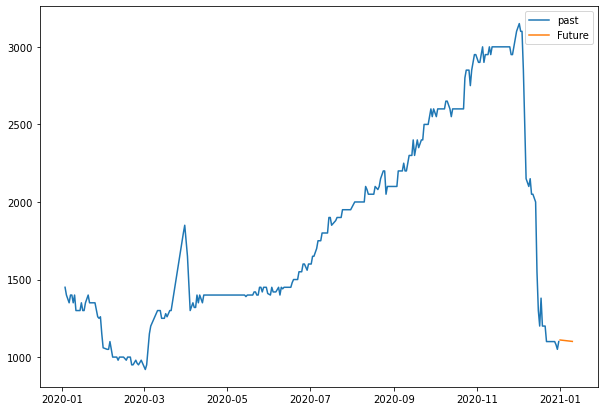

In [212]:
plt.figure(figsize=(10, 7))
plt.plot(final_trainData["Price"], label="past")
plt.plot(forecast_df_F["Pred1"], label="Future")
plt.legend()
plt.show()